In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [3]:
d=pd.read_excel("data.xlsx",sheet_name=1)
d

,Tw,dU,tauI,mul,T,tau
0,12,0.017,10.134000,0.000001,12.408,0.000010
1,14,-0.013,10.059000,0.000001,13.688,0.000010
2,16,-0.010,9.938000,0.000001,15.760,0.000010
3,18,-0.020,9.775800,0.000001,17.520,0.000010
4,20,-0.019,9.464500,0.000001,19.544,0.000009
5,22,-0.018,9.092800,0.000001,21.568,0.000009
6,24,-0.018,8.756570,0.000001,23.568,0.000009
7,26,-0.012,8.603455,0.000001,25.712,0.000009
8,28,-0.012,8.531800,0.000001,27.712,0.000009
9,30,-0.018,8.488290,0.000001,29.568,0.000008


In [4]:
a,b,sa,sb=getkb(d["T"][6:12],1/(d.tau**2-8.252e-6**2)[6:12])
a,b,sa,sb

(np.float64(22147753545.06664),
 np.float64(-402603979270.6102),
 np.float64(0.009481513313464376),
 np.float64(0.0017739014281958599))

In [5]:
-b/a

np.float64(18.17809550983961)

In [6]:
np.sqrt(sa**2+sb**2)

np.float64(0.009646026176118202)

In [7]:
-b/a*(1+np.sqrt(sa**2+sb**2))

np.float64(18.353441894959502)

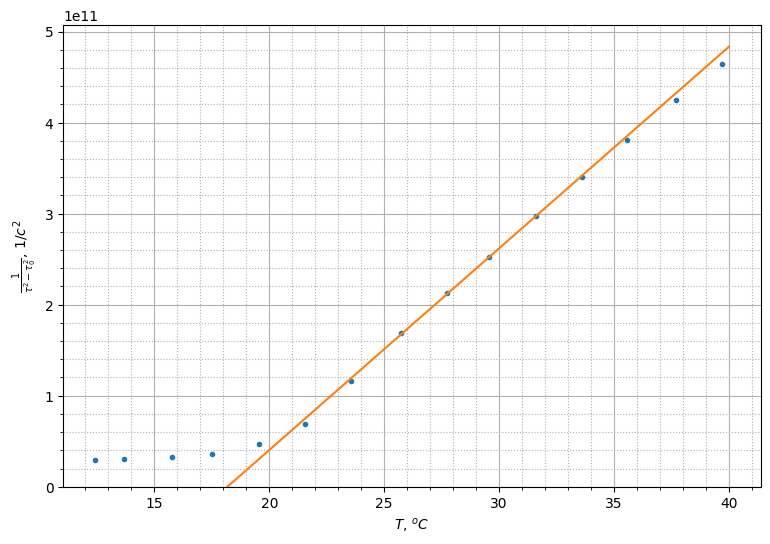

In [8]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(d["T"],1/(d.tau**2-8.252e-6**2),'.')
ax.plot(np.linspace(18.178,40,2),a*np.linspace(18.178,40,2)+b)
ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=plt.gca().get_xticks()[0])
#ax.set_xticks([5,6,7,8,9,10])
ax.set_ylabel(r"$\frac{1}{\tau^2-\tau_0^2}$, $1/c^2$")
ax.set_xlabel("$T$, $^oC$")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
fig.savefig("kuri.eps")

(0.0, 0.35224804899777024)

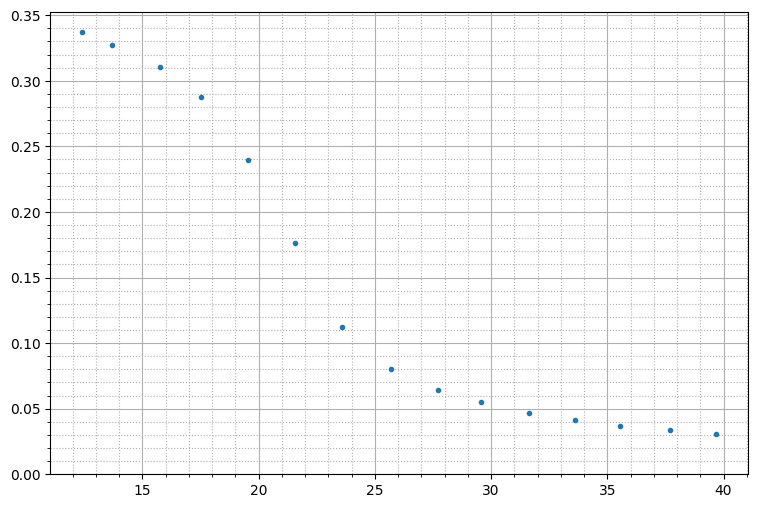

In [15]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(d["T"],(d.tau**2-8.252e-6**2)/d.tau**2,'.')
#ax.set_yscale("log")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylim(ymin=0)

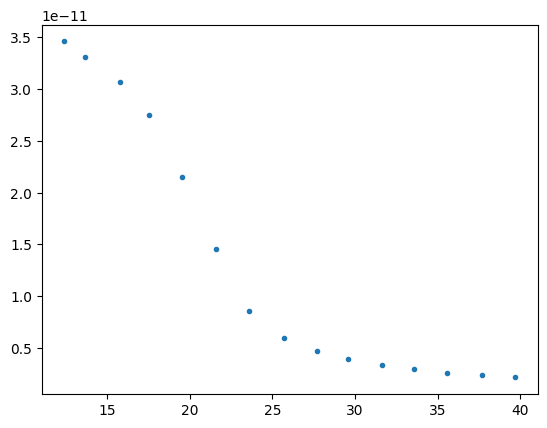

In [8]:
plt.plot(d["T"],(d.tau**2-8.252e-6**2),'.')